In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

# Things to Note
- The customer id is not needed

In [7]:
df.drop(columns=['customerID'], inplace=True, axis=1)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
num_col = [col for col in df.columns if df[col].dtype!='object']
cat_col = [col for col in df.columns if col not in num_col]

In [10]:
print('Numerical Columns:')
print(num_col)
print()
print('Categorical Columns:')
print(cat_col)

Numerical Columns:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical Columns:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [11]:
df['SeniorCitizen'].unique()

array([0, 1])

In [12]:
num_col.remove('SeniorCitizen')
cat_col.append('SeniorCitizen')

In [13]:
print('Numerical Columns:')
print(num_col)
print()
print('Categorical Columns:')
print(cat_col)

Numerical Columns:
['tenure', 'MonthlyCharges']

Categorical Columns:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'SeniorCitizen']


In [14]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Observation
- TotalCharges should be integer

In [16]:
# Checking how null values are stored in the column
for row in df['TotalCharges']:
    try:
        num = float(row)

    except ValueError:
        print(row)
        print(len(row))
    

 
1
 
1
 
1
 
1
 
1
 
1
 
1
 
1
 
1
 
1
 
1


# Observation 
- One Space is there


In [17]:
df['TotalCharges'] = df['TotalCharges'].replace({" ": "0.0"}).astype(float)
num_col.append('TotalCharges')
cat_col.remove('TotalCharges')

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Numerical Column Visualization
- Histplot
- Boxplot
- scatterplot


In [19]:
def plot_dist_num(df, column_name):
    plt.figure(figsize=(20,4))
    # Distplot
    plt.subplot(1, 3, 1)
    sns.histplot(df[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')

    col_mean = df[column_name].mean()
    col_med = df[column_name].median()
    plt.axvline(col_mean, color = 'red', linestyle='--', label='Mean')
    plt.axvline(col_med, color = 'blue', linestyle='--', label='Mean')

    plt.legend()

    # Boxplot
    plt.subplot(1,3,2)
    sns.boxplot(y=df[column_name])
    plt.title(f'Boxplot of {column_name}')

    # Scatterplot
    plt.subplot(1,3,3)
    x = df['Churn']
    y = df[column_name]
    x_numeric = [0 if value == 'No' else 1 for value in x]
    plt.scatter(x_numeric, y, color='blue', s=100 )
    plt.xlabel('Churn')
    plt.ylabel(column_name)
    plt.title(f'Scatter Plot with Churn')

    plt.show()
    

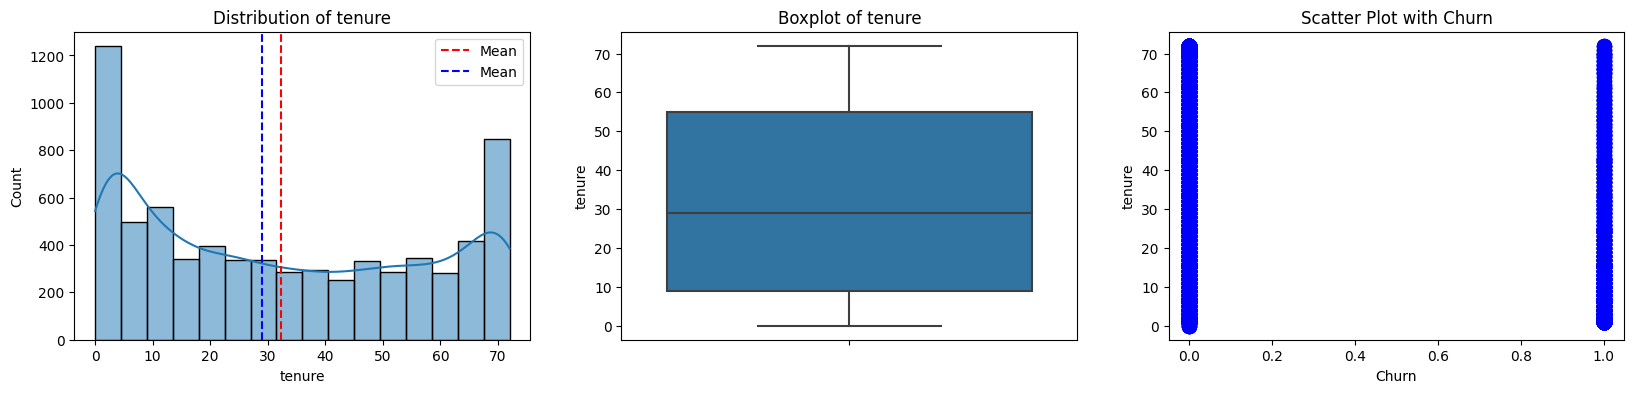

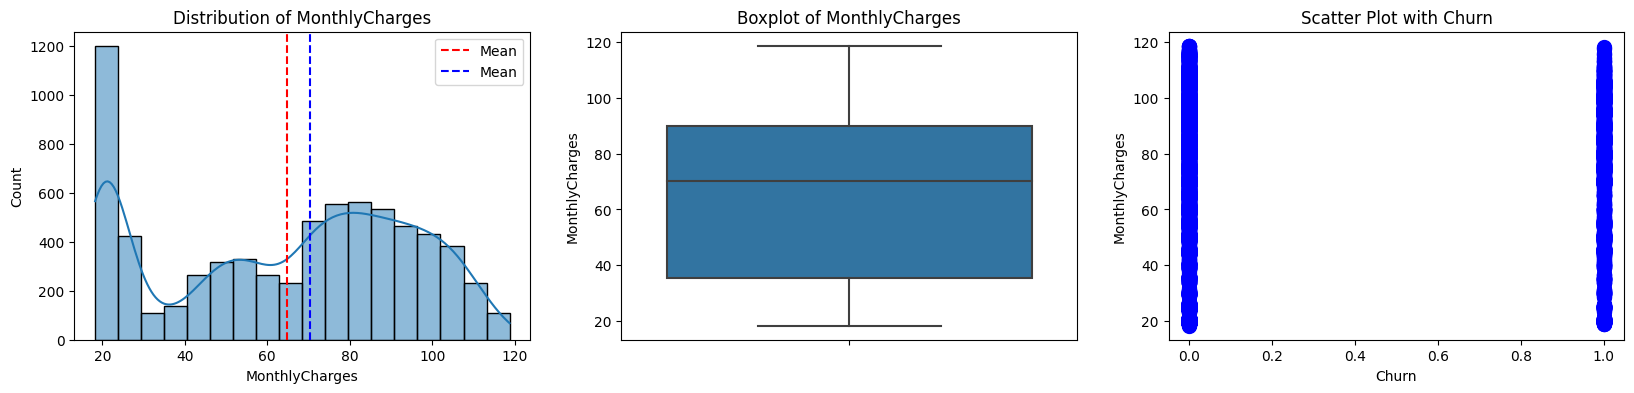

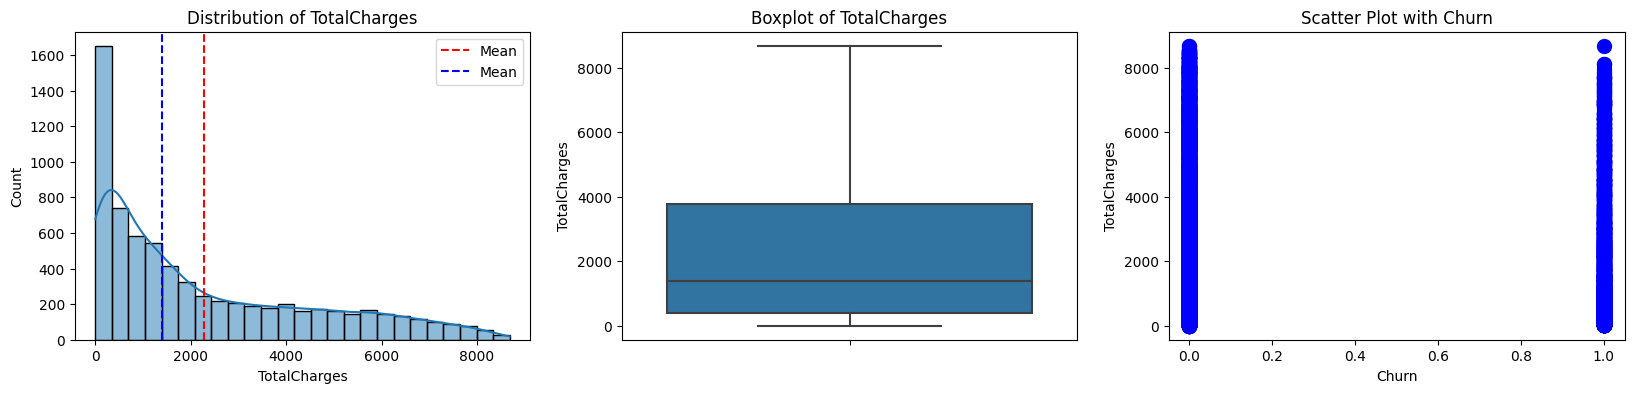

In [20]:
for col in num_col:
    plot_dist_num(df, col)

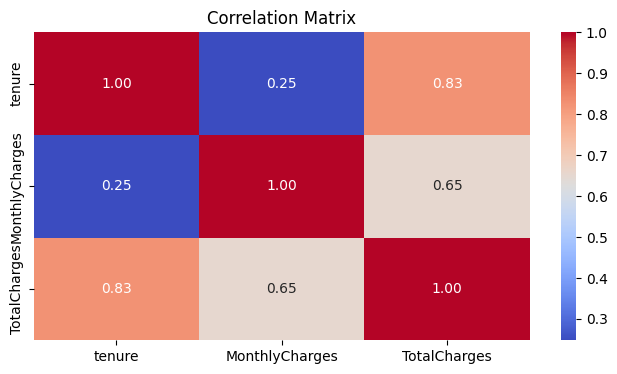

In [21]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

# Categorical Column Distribution

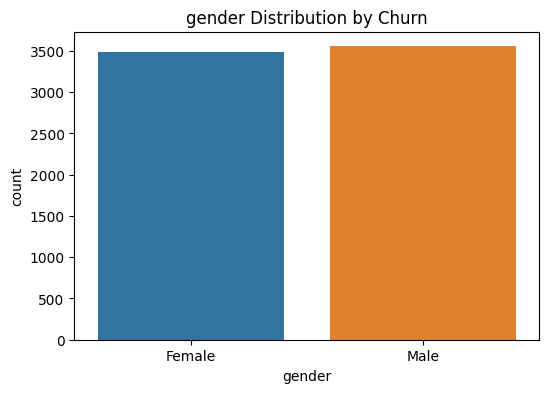

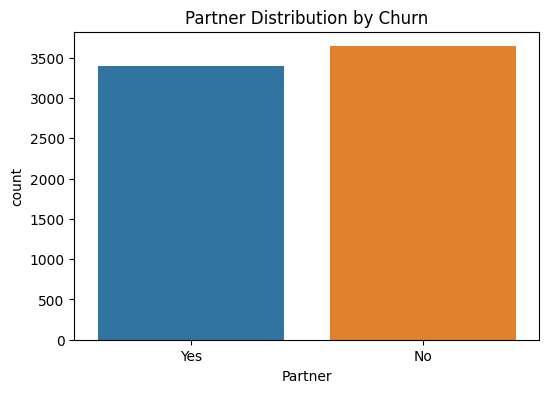

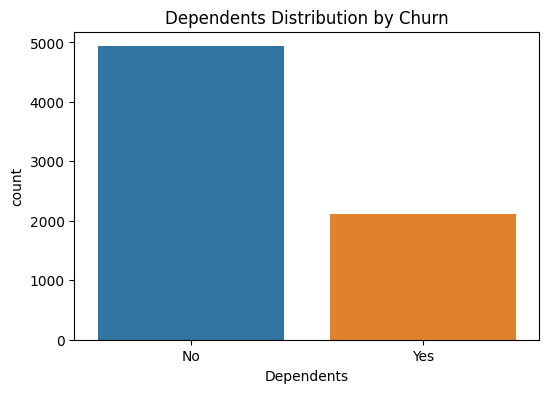

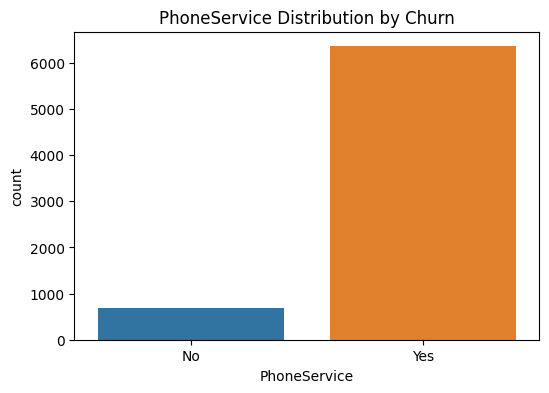

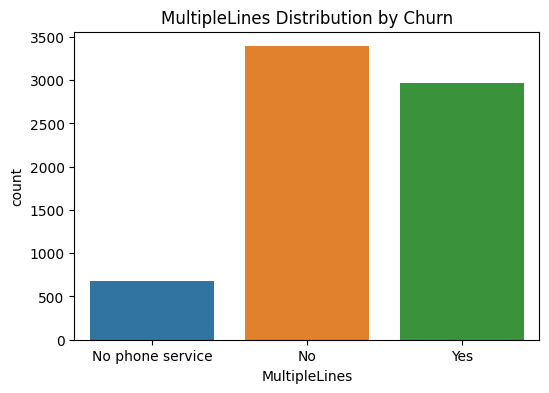

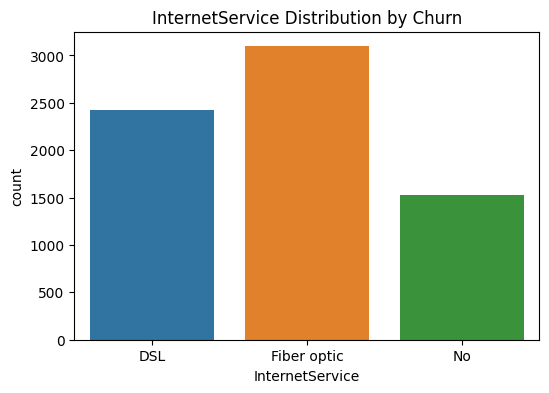

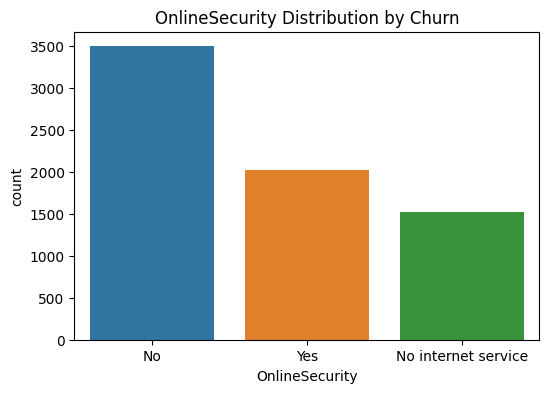

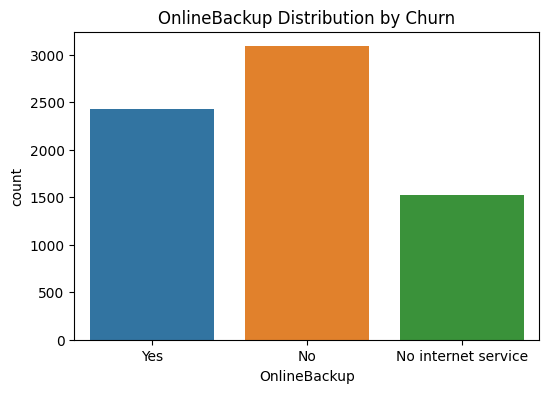

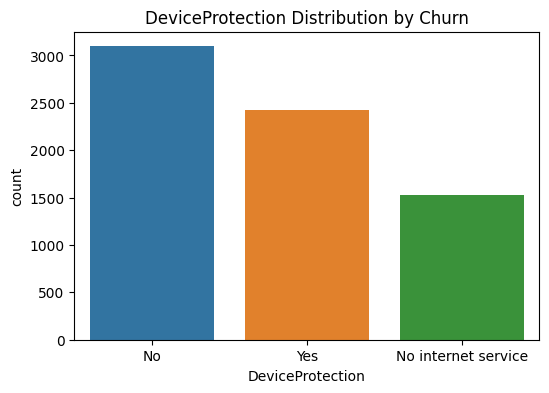

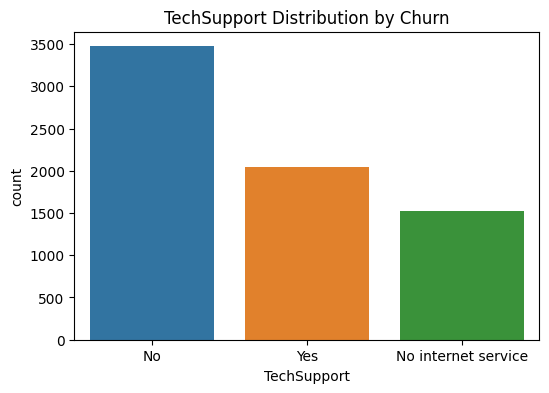

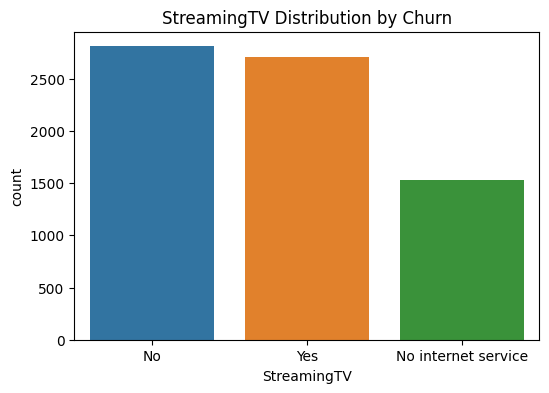

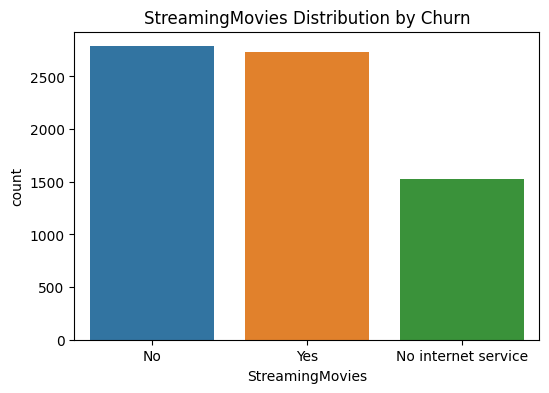

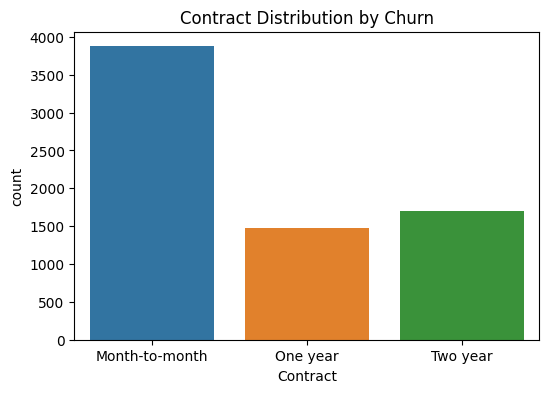

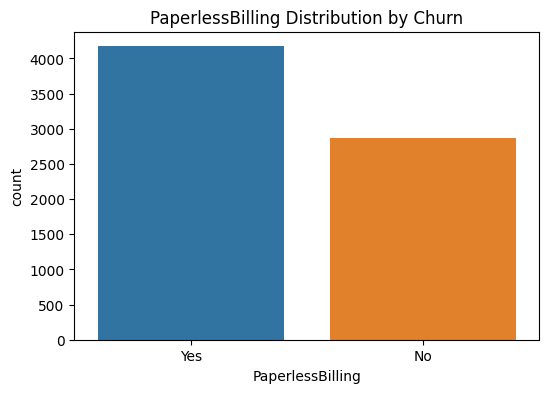

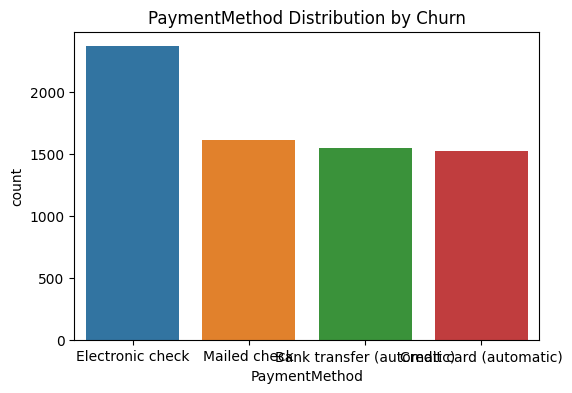

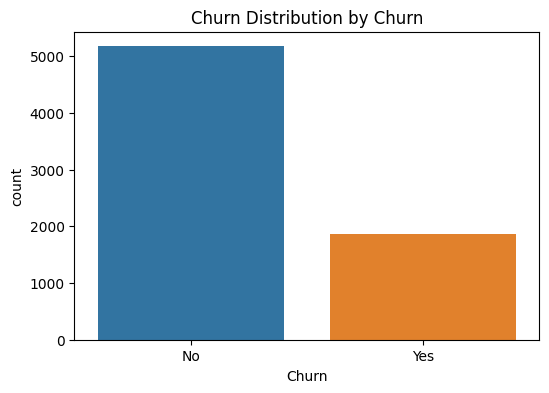

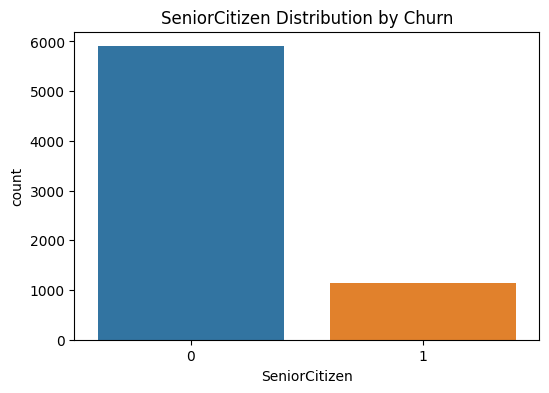

In [22]:
for col in cat_col:
    plt.figure(figsize = (6, 4))
#     sns.countplot(data = df, x = col, hue = 'Churn')
    sns.countplot(x = df[col])
    plt.title(f"{col} Distribution by Churn")
    plt.show()

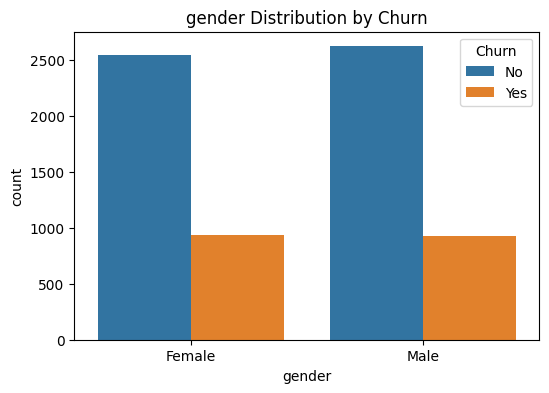

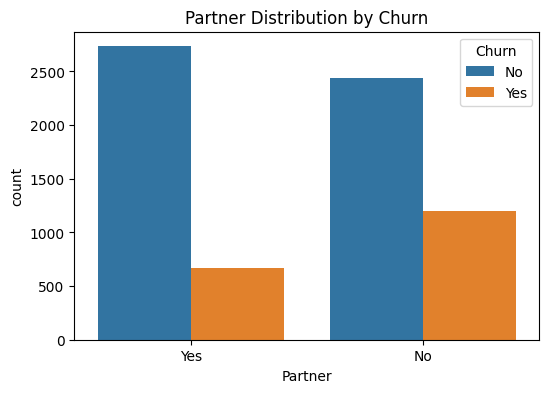

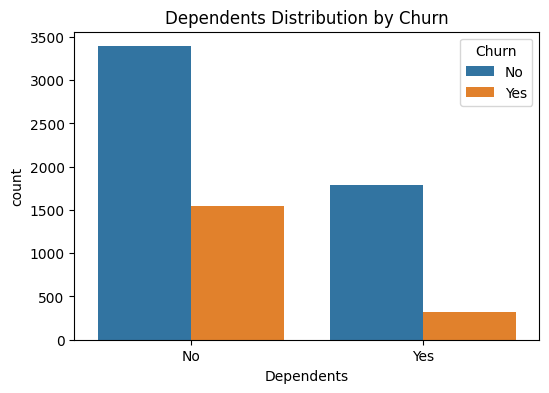

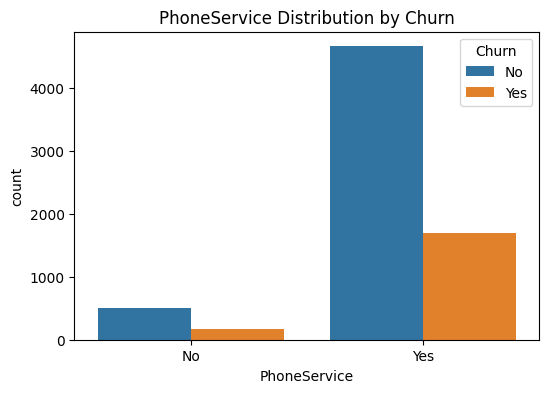

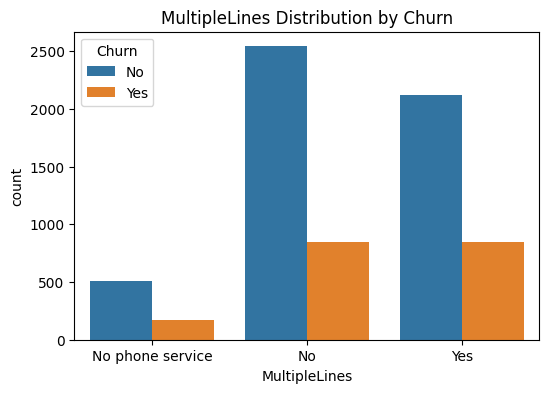

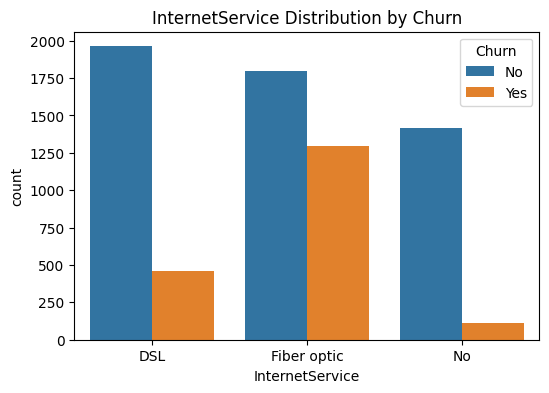

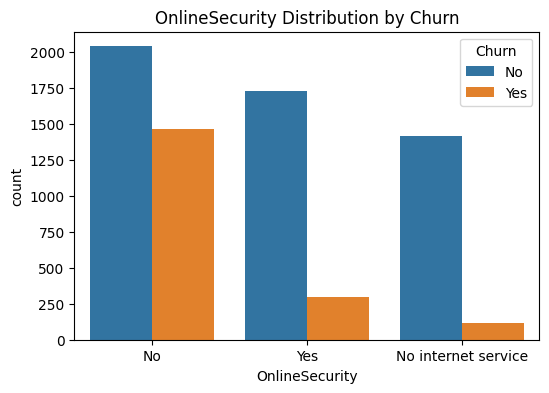

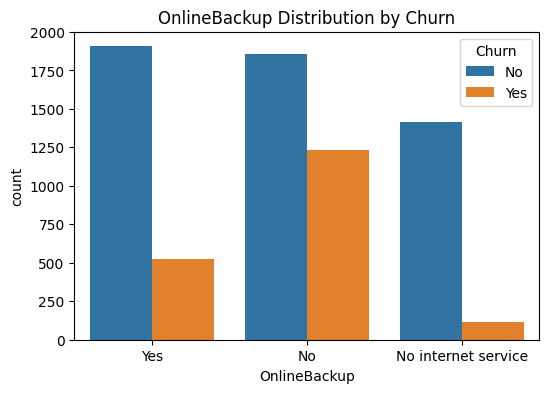

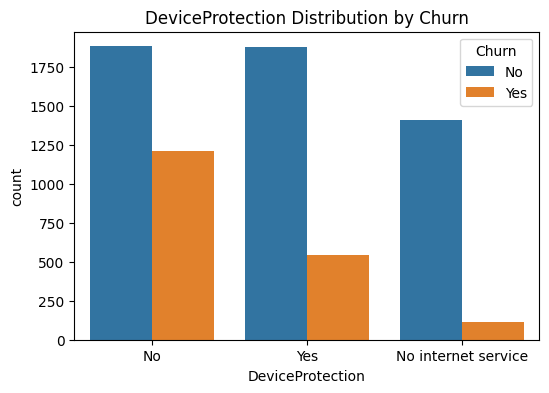

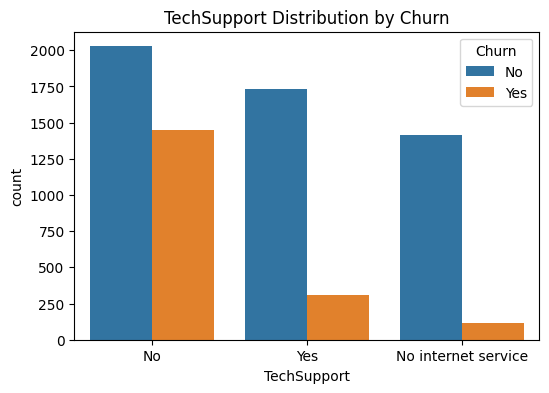

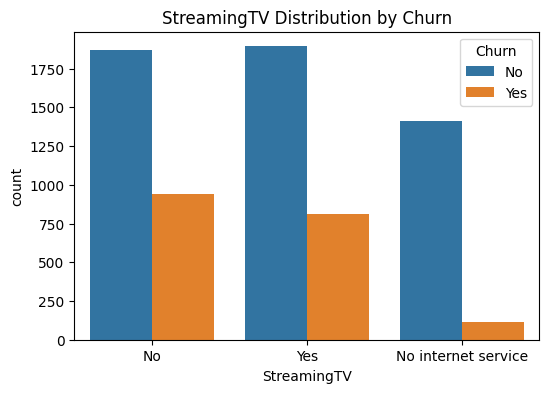

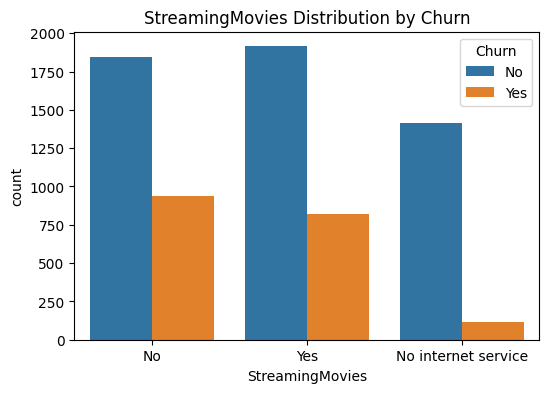

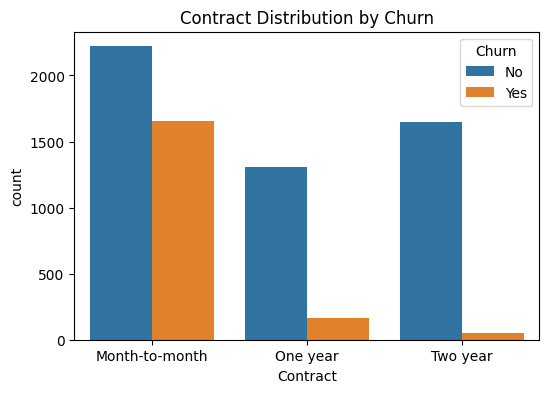

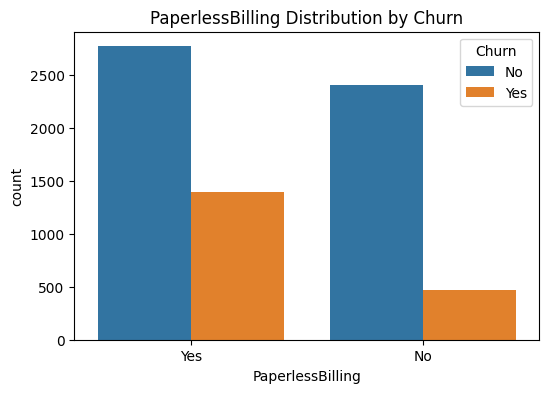

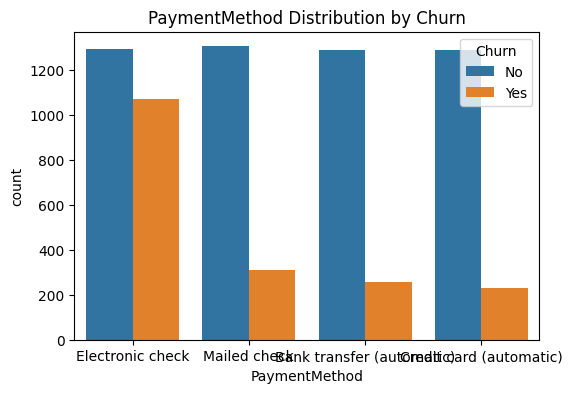

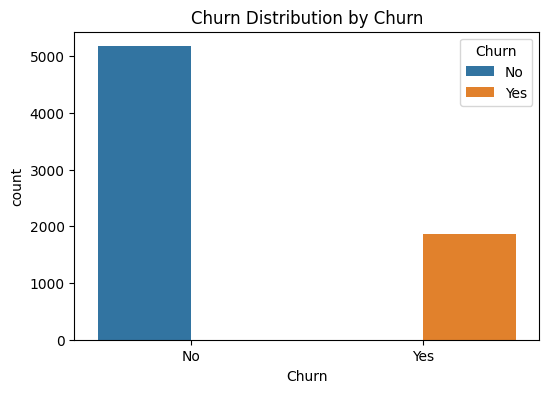

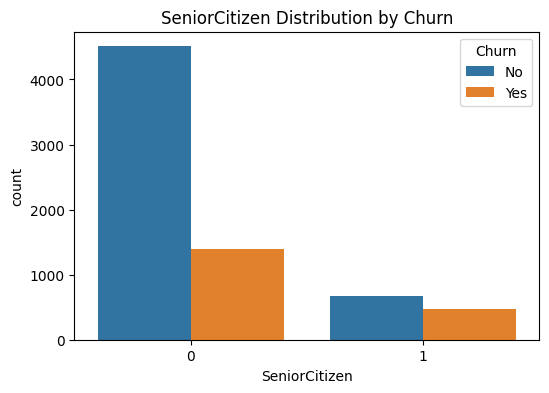

In [23]:
for col in cat_col:
    plt.figure(figsize = (6, 4))
    sns.countplot(data = df, x = col, hue = 'Churn')
    # sns.countplot(x = df[col])
    plt.title(f"{col} Distribution by Churn")
    plt.show()

# Data Preprocessing

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = {}

for col in cat_col:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoder[col] = label_encoder

In [25]:
encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder(),
 'SeniorCitizen': LabelEncoder()}

In [26]:
import pickle
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [27]:
from sklearn.preprocessing import StandardScaler

scalers = {}

for col in num_col:
    scaler = StandardScaler()
    df[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
    scalers[col] = scaler

In [28]:
scalers

{'tenure': StandardScaler(),
 'MonthlyCharges': StandardScaler(),
 'TotalCharges': StandardScaler()}

In [29]:
with open('scalers.pkl', 'wb') as f:
    pickle.dump(scalers, f)

# Model Building

In [30]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [31]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

# Observation
- Needs augmentation, may use SMOTE

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42, sampling_strategy=0.75)

X_train, y_train = smote.fit_resample(X_train, y_train)

In [36]:
y_train.value_counts()

Churn
0    4138
1    3103
Name: count, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


In [38]:
models = {
    'Logistic_Regression' : LogisticRegression(),
    'Random_Forest' : RandomForestClassifier(),
    'XGBoost' : XGBClassifier(),
    'SVM' : SVC(),
    'LightGBM' : LGBMClassifier(),
    'KNN' : KNeighborsClassifier(),
    'CatBoost' : CatBoostClassifier(),
    'NaiveBayes' : GaussianNB(),
    
}

# HyperParameters:


In [39]:
hyperparameters = {
    "Logistic_Regression": {
        "C": [0.1, 1],
        "solver": ['liblinear'],
        "max_iter": [100]
    },
    "Random_Forest": {
        "n_estimators": [100], 
        "max_depth": [10, None],  
        "min_samples_split": [2], 
        "min_samples_leaf": [1], 
        "max_features": ['sqrt']
    },
    "XGBoost": {
        "learning_rate": [0.1], 
        "n_estimators": [100],
        "max_depth": [3, 5],  
        "subsample": [0.8], 
        "colsample_bytree": [0.8],  
    },
    "SVM": {
        "C": [1, 10],  
        "kernel": ['rbf'], 
        "degree": [3]  
    },
    "LightGBM": {
        "n_estimators": [100], 
        "learning_rate": [0.1],  
        "max_depth": [10],  
        "num_leaves": [31], 
        "min_child_samples": [20], 
        "subsample": [0.8], 
        "colsample_bytree": [0.8]  
    },
    "KNN": {
        "n_neighbors": [5], 
        "weights": ['uniform'], 
        "algorithm": ['auto'], 
        "leaf_size": [30], 
    },
    "CatBoost": {
        "iterations": [100], 
        "depth": [6], 
        "learning_rate": [0.1],
        "l2_leaf_reg": [3],  
    },
    "NaiveBayes": {
        "var_smoothing": [1e-9]
    }
}

In [40]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

best_models = {}

for model_name, model in tqdm(models.items(), desc="Tuning models", ncols=100):
    print(f"Tuning {model_name}....")
    # print(model)
    
    # GridSearchCV for model hyperparameters
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv=5, scoring='f1_macro')
    grid.fit(X_train, y_train)
    
    # Save the best model
    best_models[model_name] = grid.best_estimator_
    
    # Print results
    # print(f"Best parameters for {model_name}: {grid.best_params_}")
    # print(f"Best F1 score for {model_name}: {grid.best_score_: .2f}\n")


Tuning models:   0%|                                                          | 0/8 [00:00<?, ?it/s]

Tuning Logistic_Regression....


Tuning models:  12%|██████▎                                           | 1/8 [00:00<00:01,  3.70it/s]

Tuning Random_Forest....


Tuning models:  25%|████████████▌                                     | 2/8 [00:06<00:23,  3.91s/it]

Tuning XGBoost....


Tuning models:  38%|██████████████████▊                               | 3/8 [00:07<00:13,  2.65s/it]

Tuning SVM....


Tuning models:  50%|█████████████████████████                         | 4/8 [00:27<00:37,  9.26s/it]

Tuning LightGBM....
[LightGBM] [Info] Number of positive: 2482, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 5792, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428522 -> initscore=-0.287884
[LightGBM] [Info] Start training from score -0.287884
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2483, number of negative: 3310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=

Tuning models:  62%|███████████████████████████████▎                  | 5/8 [00:28<00:18,  6.20s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Tuning KNN....


Tuning models:  75%|█████████████████████████████████████▌            | 6/8 [00:28<00:08,  4.24s/it]

Tuning CatBoost....
0:	learn: 0.6609760	total: 54.7ms	remaining: 5.41s
1:	learn: 0.6366191	total: 56.1ms	remaining: 2.75s
2:	learn: 0.6133220	total: 57.5ms	remaining: 1.86s
3:	learn: 0.5953120	total: 59.1ms	remaining: 1.42s
4:	learn: 0.5795594	total: 60.8ms	remaining: 1.16s
5:	learn: 0.5654310	total: 62.5ms	remaining: 980ms
6:	learn: 0.5529851	total: 64.1ms	remaining: 852ms
7:	learn: 0.5420450	total: 65.8ms	remaining: 757ms
8:	learn: 0.5322640	total: 67.6ms	remaining: 684ms
9:	learn: 0.5230074	total: 69.2ms	remaining: 623ms
10:	learn: 0.5151139	total: 70.7ms	remaining: 572ms
11:	learn: 0.5083804	total: 72.3ms	remaining: 530ms
12:	learn: 0.5022194	total: 73.9ms	remaining: 495ms
13:	learn: 0.4968270	total: 75.5ms	remaining: 464ms
14:	learn: 0.4909469	total: 77.1ms	remaining: 437ms
15:	learn: 0.4859135	total: 78.7ms	remaining: 413ms
16:	learn: 0.4818758	total: 80.2ms	remaining: 391ms
17:	learn: 0.4779989	total: 81.7ms	remaining: 372ms
18:	learn: 0.4746989	total: 83.2ms	remaining: 355ms
19

Tuning models: 100%|██████████████████████████████████████████████████| 8/8 [00:29<00:00,  3.73s/it]

40:	learn: 0.4431648	total: 71.6ms	remaining: 103ms
41:	learn: 0.4422143	total: 73.1ms	remaining: 101ms
42:	learn: 0.4413941	total: 74.7ms	remaining: 99ms
43:	learn: 0.4404597	total: 76.4ms	remaining: 97.3ms
44:	learn: 0.4396343	total: 78ms	remaining: 95.4ms
45:	learn: 0.4390946	total: 79.8ms	remaining: 93.6ms
46:	learn: 0.4383642	total: 81.7ms	remaining: 92.2ms
47:	learn: 0.4376026	total: 83.5ms	remaining: 90.5ms
48:	learn: 0.4369621	total: 85.4ms	remaining: 88.9ms
49:	learn: 0.4362068	total: 86.9ms	remaining: 86.9ms
50:	learn: 0.4355202	total: 88.8ms	remaining: 85.3ms
51:	learn: 0.4347931	total: 90.6ms	remaining: 83.6ms
52:	learn: 0.4342073	total: 92.2ms	remaining: 81.8ms
53:	learn: 0.4336017	total: 94.2ms	remaining: 80.2ms
54:	learn: 0.4329100	total: 95.8ms	remaining: 78.4ms
55:	learn: 0.4324009	total: 97.5ms	remaining: 76.6ms
56:	learn: 0.4320393	total: 99.3ms	remaining: 74.9ms
57:	learn: 0.4313459	total: 101ms	remaining: 73ms
58:	learn: 0.4309434	total: 102ms	remaining: 71.2ms
59:

In [41]:
best_models

{'Logistic_Regression': LogisticRegression(C=1, solver='liblinear'),
 'Random_Forest': RandomForestClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'SVM': SVC(C=10),
 'LightGBM': LGBMClassifier(colsample_bytree=0.8, max_depth=10, subsample=0.8),
 'KNN': KNeig

In [42]:
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# lgbm_model = LGBMClassifier(n_estimators: 100, 
#         max_depth: 10,  
#         min_samples_split: 2, 
#         min_samples_leaf: 1, 
#         max_features: 'sqrt')
# xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, colsample_bytree=0.8, random_state=42)

# # Create a voting ensemble
# voting_ensemble = VotingClassifier(
#     estimators=[
#         ('rf', rf_model),
#         ('lgbm', lgbm_model),
#         ('xgb', xgb_model)
#     ],
#     voting='soft'  # Use 'soft' voting to consider predicted probabilities
# )

# # Train the ensemble model
# voting_ensemble.fit(X_train, y_train)

In [43]:
from sklearn.ensemble import VotingClassifier
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt', 
    random_state=42
)

xgb_model = XGBClassifier(
    learning_rate=0.1, 
    n_estimators=100, 
    max_depth=5, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    use_label_encoder=False,  # Suppress a warning in newer versions of XGBoost
    eval_metric='mlogloss',   # Required for multi-class classification
    random_state=42
)

lgbm_model = LGBMClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=10, 
    num_leaves=31, 
    min_child_samples=20, 
    subsample=0.8, 
    colsample_bytree=0.8, 
    random_state=42
)

voting_ensemble = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'  
)

voting_ensemble.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3103, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 7241, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.428532 -> initscore=-0.287843
[LightGBM] [Info] Start training from score -0.287843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=N...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgbm',
                              LGBMClassifier(colsample_bytree=0.8, max_depth=10,
                                             random_state=42, subsample=0.8))],
                 voting='soft')

In [44]:
from sklearn.metrics import accuracy_score
y_pred = voting_ensemble.predict(X_test)
accuracy_score(y_test, y_pred)

0.7863733144073811

In [45]:
with open('ensemble_model.pkl', 'wb') as f:
    pickle.dump(voting_ensemble, f)

In [46]:
# y_pred = voting_ensemble.predict(X_train)
# accuracy_score(y_train, y_pred)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1036
           1       0.58      0.71      0.64       373

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.80      0.79      0.79      1409



Text(0.5, 14.722222222222216, 'Predicted Labels')

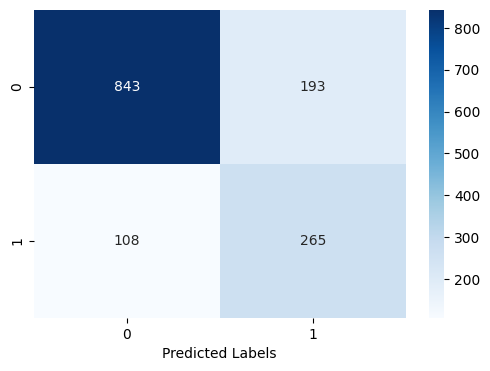

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")

In [50]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import os
import warnings

# Print versions
print(f"Pandas Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Matplotlib Version: {matplotlib.__version__}")
print(f"Seaborn Version: {sns.__version__}")

import sklearn
print(f"Scikit-Learn Version: {sklearn.__version__}")

# OS Version
print(f"OS: {os.name}")  


Pandas Version: 2.2.3
Numpy Version: 1.26.4
Matplotlib Version: 3.7.5
Seaborn Version: 0.12.2
Scikit-Learn Version: 1.2.2
OS: posix
